# Computational Methods for Optimization

## Nuno M. Rodrigues, 2021/2022


### Optimization and Hill Climber

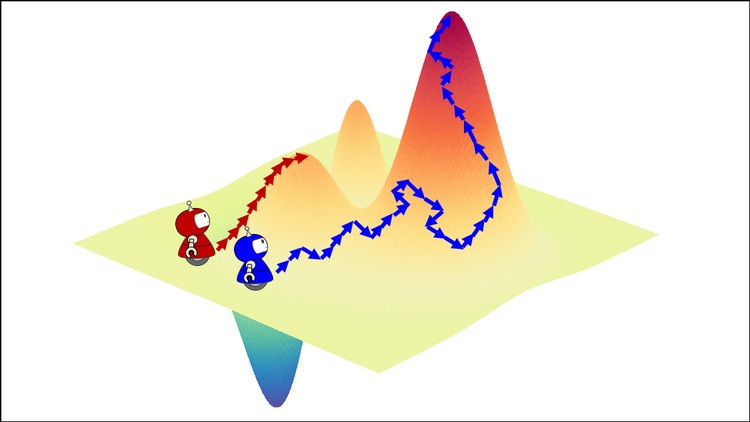

#### Optimization

Optimization problems can be defined by the tuple $(S,f)$  
$S \rightarrow$  Search space, the set of all admissible solutions  
$f \rightarrow$ Fitness function, applied to all elements of S to give them a real value based on their performance


There are two types of problems in optimization:  

*Maximization*: Finding the best solution $o \in S$ so that $f(o) \ge f(i), \forall i \in S$  
*Minimization*: Finding the best solution $o \in S$ so that $f(o) \le f(i), \forall i \in S$

Independently of the problem, $o$ is called the *global optima*.  
Aditionally, solutions that are worse than $o$ but are better than their neighbors, are called *local optima*.

#### No Free Lunch

So, why study multiple algorithms? Why not just pick the best? Well, because there is no *best* algorithm.  
As the No Free Lunch theorem says:

"Given any pair of Computational Intelligence algorithms $A1$ and $A2$, $A1$ and $A2$ have identical average performance, calculated on all existing optimization problems."

Given $A1$, $A2$ and a problem $P1$, if $A1$ $>$ $A2$ on $P1$, there is bound to exist a $P2$ where $A2$ $>$ $A1$.


#### From a tuple to a trio

All algorithms we will study in this class require the concept of neighborhood, such that they can be defined by the triple $(S,f,N)$  

$N \rightarrow$ Neighborhood. Set of solutions that can be obtained from an original solution $x$ by applying a transformation.

The distance between two solutions, meaning the number of transformations required to get from a solution to another, can usually be tracked by distance metrics. The [edit distance](https://en.wikipedia.org/wiki/Edit_distance) is one common example.

Fitness lanscape, shows rough or smooth a problem is. If its rough, then we have a a hard problem

#### Hill Climber

The Hill Climber (HC) is a search algorithm which tries to find the best solution through the continuous application of small (in theory) incremental changes.  
There are multiple variations of this algorithm, and we will start by implementing the  Steepest-Ascent version, which is arguably the easiest one to implement.

Steepest-Ascent Hill Climber:
1. Generate a random initial solution, calculate it's fitness value, and set it as the current solution $i$.
2. Using the neighborhood function, generate the set of neighbors $N(i)$ from $i$.
2. Calculate the fitness of the neighbors, and get the best neighbor $j$.
3. If $f(j) >= f(i)$ than the solution is accepted, $j$ becomes the current solution, and we repeat step 2.
4. If $f(j) < f(i)$ that means we reached a local optima and we can end the algorithm.

As our algorithm does not allow for solutions worse than the current one, we can say that it only performs *exploitation*.

### Defining our problem

In order to apply the HC algorithm, we need to chose a problem we wish to optimize.

One common application is function optimization. As you know, most problems can be represented as functions, so by optimizing a function we are solving a problem.  
In this class we will look at the Ackley function.

$f(x_0 \cdots x_n) = -20 exp(-0.2 \sqrt{\frac{1}{n} \sum_{i=1}^n x_i^2}) - exp(\frac{1}{n} \sum_{i=1}^n cos(2\pi x_i)) + 20 + e$

We will be working in a 2 dimensional space, so we can simplify the function:

$f(x,y) = -20 exp(-0.2 \sqrt{0.5 (x^2 + y^2)}) - exp(0.5 (cos2\pi x + cos2\pi y)) + 20 + e$  

The domain of our function will be the folowing:

$-5 \leq x,y \leq 5$

### Implementing

First, let us start by importing all packages that might be useful.

In [2]:
#%matplotlib widget
import matplotlib
import numpy as np
from numpy import exp,sqrt,cos,e,pi
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import random
import math

Then, let us define the `ackley function` in python.  
We can make use of `numpy` to use all variable and operations we need.

In [2]:
def function(x,y):
     return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20

Now, let us make use of the `matplotlib` library to plot our function.

The `linspace(a,b,c)` function generate a set of `c` linearly separated points between the bounds of `a` and `b`, with `a` and `b` being our domain edges.

We then create a `meshgrid` of both `x` and `y` points, which maps then creating a 2D grid of all points.

By applying the previously defined function to this meshgrid we will get the fitness of all points, allowings to then to create a visual representation of our problem.

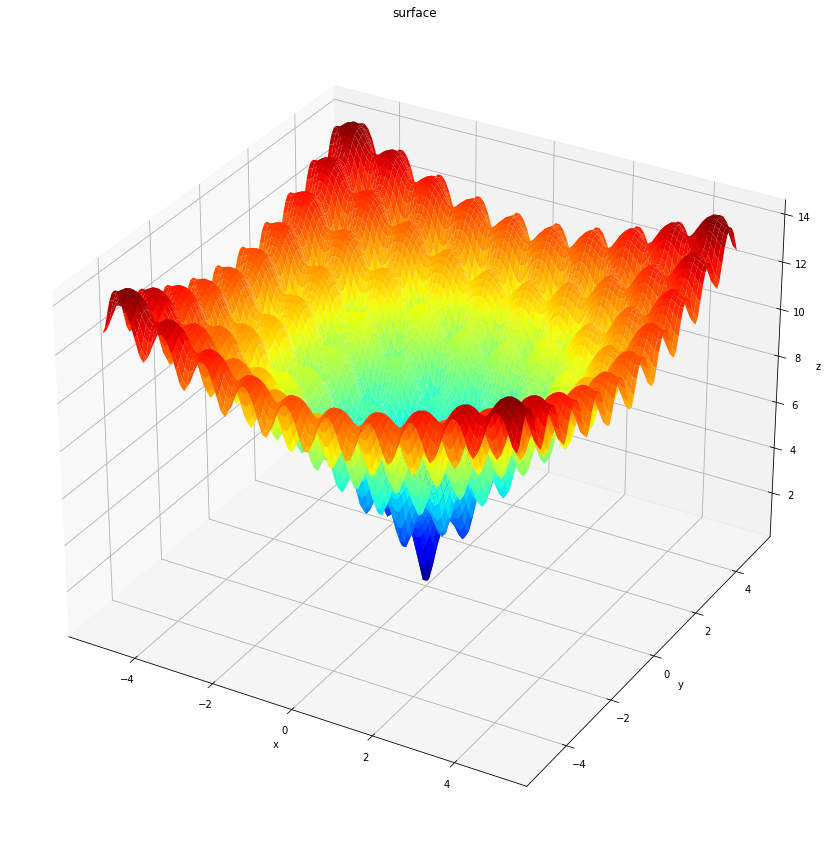

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)
Z = function(X, Y)

plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='jet', edgecolor='none')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### Defining the neighborhood

Since we are working in a small and constrained 2D space, we could create a neighborhood by generating a small gaussian perturbation, and apply it to the coordinates of the solution.  
Since we can independently either add or subtract this perturbation to both coordinates, we end up with a nighborhood of 8 solutions.

Let us create a function that generates this neighborhood:

In [4]:
# The neighborhood function
def get_neighbors(sol):
    p = np.random.normal(0, 0.25)
    x,y = sol
    n1 = (x+p,y)
    n2 = (x-p,y)
    n3 = (x,y+p)
    n4 = (x,y-p)
    n5 = (x+p,y+p)
    n6 = (x-p,y-p)
    n7 = (x+p,y-p)
    n8 = (x-p,y+p)

By using a mean of $0$ and a standard deviation of $0.25$, our gaussian distribution will look like this:

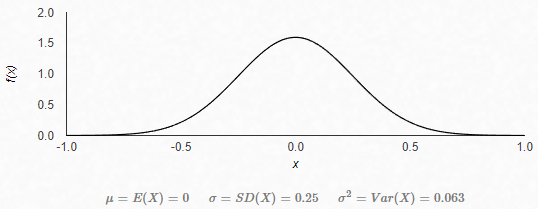

#### Assembling the algorithm

Let us start assembling our Hill Climber algorithm.  

First thing we need to do is define the HillClimber class:

In [5]:
class Hillclimber():
    def __init__(self):
        pass

We need to store the solutions, and their fitness values, that we will come across during the execution of this algorithm.  
One way to do this is to create two list during the initialization of the class:

In [7]:
class Hillclimber():
    def __init__(self):
        self.solutions = []
        self.fitnesses = []

We have already previously defined both the function we wish to optmize, as well as the neighborhood function, so we can add those as well:

In [8]:
class Hillclimber():
    def __init__(self):
        self.solutions = []
        self.fitnesses = []
    
    def function(self,x,y):
        return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20
    
    # The neighborhood function
    def get_neighbors(self,sol):
        p = np.random.normal(0, 0.25)
        x,y = sol
        n1 = (x+x*p,y)
        n2 = (x-x*p,y)
        n3 = (x,y+y*p)
        n4 = (x,y-y*p)
        n5 = (x+x*p,y+y*p)
        n6 = (x-x*p,y-y*p)
        n7 = (x+x*p,y-y*p)
        n8 = (x-x*p,y+y*p)
    
        return [n1,n2,n3,n4,n5,n6,n7,n8]

The last thing missing now is the cycle itself.  
Usually the function that performs the cycle, or runs the algorithm, is called `fit`, because it is fitting the algorithm to our problem.

In [15]:
# Let's start by defining the Hillclimber class

class Hillclimber():
    def __init__(self):
        self.solutions = []
        self.fitnesses = []
    
    def function(self,x,y):
        return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20
    
    # The neighborhood function
    def get_neighbors(self,sol):
        p = np.random.normal(0, 0.25)
        x,y = sol
        n1 = (x+x*p,y)
        n2 = (x-x*p,y)
        n3 = (x,y+y*p)
        n4 = (x,y-y*p)
        n5 = (x+x*p,y+y*p)
        n6 = (x-x*p,y-y*p)
        n7 = (x+x*p,y-y*p)
        n8 = (x-x*p,y+y*p)
    
        return [n1,n2,n3,n4,n5,n6,n7,n8]
    
    
    # The main training cycle
    def fit(self):
        # Let's start by creating our initial random solution, calculating its fitness value, and storing it
        s = (np.random.uniform(3,4,1),np.random.uniform(3,4,1))
        fitness = self.function(s[0],s[1])
        self.solutions.append(s)
        self.fitnesses.append(fitness)
        
        # Since we do not know the number of iterations, a while cycle is the better suited.
        while True:
            # Let's get the neighbors of our current solution and calculate their fitness values
            neighbors = self.get_neighbors(s)
            fitN = [self.function(n[0],n[1]) for n in neighbors]
            
            # This function returns the index of the minimum element
            best = np.argmin(fitN)
            
            # If the best neighbor is better than the current solution, it becomes the new solution
            if fitN[best] <= fitness:
                s = neighbors[best]
                fitness = fitN[best]
                self.solutions.append(s)
                self.fitnesses.append(fitness)
            # Else, we end the algorithm
            else:
                break
        print('Finished Training')
    
    # Helper function to print out the fitness values
    def show_results(self):
        for i,elem in enumerate(self.solutions):
            print('Epoch: ', i, '    Solution: ', self.fitnesses[i],'    Fitness: ', elem, '\n')
            

**Some notes**  
The `argmin` looks for the minimum element in the list and returns its index.  
In this case, because the list of neighbors and list of their fitness values is in the same order, by knowing the index of the smallest values we know the index corresponding to that neighbor.

We can include an additional function, lets call it `show_results` to print out the results we obtained during each iteration of the algorithm.


#### Running the algorithm
Let us now run the algorithm.  
We start by creating a `HillClimber` object and associate it to a variable.  
Them, we call the `fit` method to run the algirthm, followed by our helper function `show_results`.

In [16]:
hc = Hillclimber()

In [17]:
hc.fit()

KeyboardInterrupt: 

In [ ]:
hc.show_results()

Alright, as we can see, our algorithm is working.  
However, did we get good results? Is it robust? Nothing better than to plot the results in order to confirm.  
In the $x$ axis we have the iterations/epochs, while on the $y$ axist we have the fitness values of the solutions.  
As we can see, our algorithm had a smooth and steep rise in the fitness values of the solutions, as intended.  

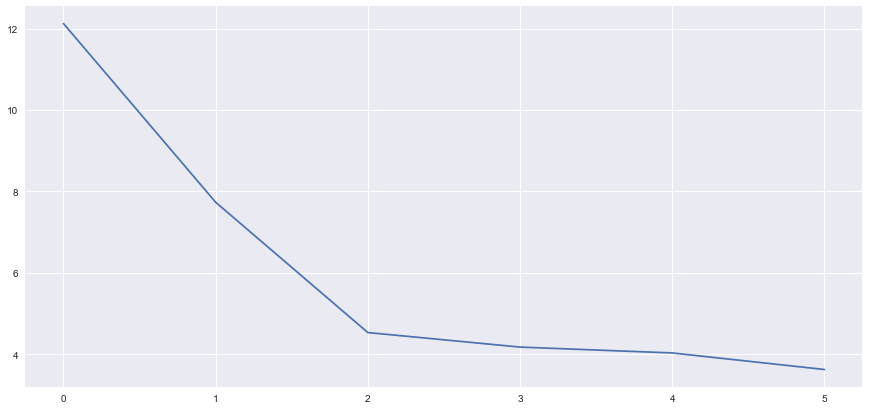

In [203]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

#general figure options
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, len(hc.fitnesses)), ylim=(np.min(hc.fitnesses)-0.5,np.max(hc.fitnesses)+0.5))
line, = ax.plot([], [], lw=2)
ax.set_title('HC results', fontsize=18)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Fitness', fontsize=16)
ax.tick_params(labelsize=12)

epochs = [i for i in range(len(hc.fitnesses))]

plt.plot(epochs, hc.fitnesses)


plt.show()

#### Improving the results

There are multiple ways to improve the Hill Climber.

One of the first things we can try changing, is not even related to the algorithm itself: the neighborhood function!

In this specific case we know our problem, and it is very simple, so we can make an artificial better version of the function.  
Let's say that instead of a random value taken from a gaussian distribution, we simply add or subtract 0.5 to each coordinate value. Let's see how it goes!

In [18]:
# Let's start by defining the Hillclimber class

class Hillclimber2():
    def __init__(self):
        self.solutions = []
        self.fitnesses = []
    
    def function(self,x,y):
        return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20
    
    # The neighborhood function
    def get_neighbors(self,sol):
        p = np.random.normal(0, 0.25)
        x,y = sol
        n1 = (x+0.5,y)
        n2 = (x-0.5,y)
        n3 = (x,y+0.5)
        n4 = (x,y-0.5)
        n5 = (x+0.5,y+0.5)
        n6 = (x-0.5,y-0.5)
        n7 = (x+0.5,y-0.5)
        n8 = (x-0.5,y+0.5)
    
        return [n1,n2,n3,n4,n5,n6,n7,n8]
    
    
    # The main training cycle
    def fit(self):
        # Let's start by creating our initial random solution, calculating its fitness value, and storing it
        s = (np.random.uniform(3,4,1),np.random.uniform(3,4,1))
        fit = self.function(s[0],s[1])
        self.solutions.append(s)
        self.fitnesses.append(fit)
        
        # Since we do not know the number of iterations, a while cycle is the better suited.
        while True:
            # Let's get the neighbors of our current solution and calculate their fitness values
            neighbors = self.get_neighbors(s)
            fitN = [self.function(n[0],n[1]) for n in neighbors]
            
            # This function returns the index of the minimum element
            best = np.argmin(fitN)
            
            # If the best neighbor is better than the current solution, it becomes the new solution
            if fitN[best] <= fit:
                s = neighbors[best]
                fit = fitN[best]
                self.solutions.append(s)
                self.fitnesses.append(fit)
            # Else, we end the algorithm
            else:
                break
        print('Finished Training')
    
    # Helper function to print out the fitness values
    def show_results(self):
        for i,elem in enumerate(self.solutions):
            print('Epoch: ', i, '    Solution: ', self.fitnesses[i],'    Fitness: ', elem, '\n')
            

In [19]:
hc2 = Hillclimber2()


In [20]:
hc2.fit()

Finished Training


In [21]:
hc2.show_results()

Epoch:  0     Solution:  [12.46926533]     Fitness:  (array([3.49879633]), array([3.69200361])) 

Epoch:  1     Solution:  [9.98244508]     Fitness:  (array([2.99879633]), array([3.19200361])) 



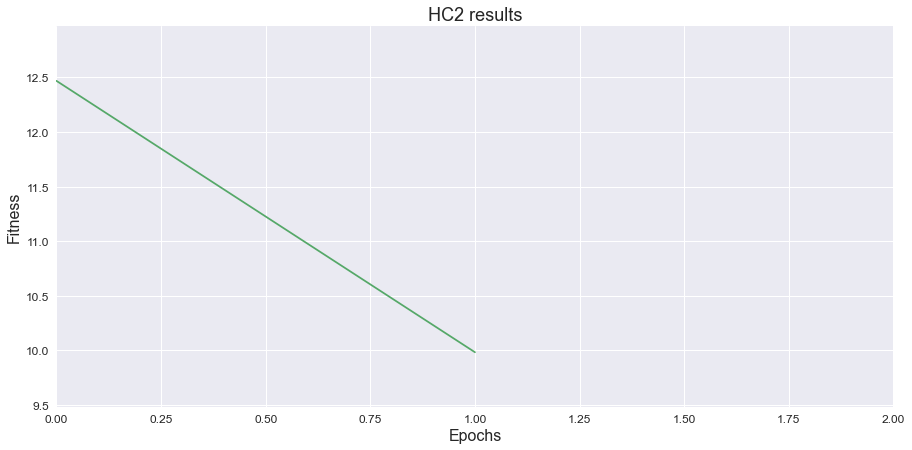

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

#general figure options
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, len(hc2.fitnesses)), ylim=(np.min(hc2.fitnesses)-0.5,np.max(hc2.fitnesses)+0.5))
line, = ax.plot([], [], lw=2)
ax.set_title('HC2 results', fontsize=18)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Fitness', fontsize=16)
ax.tick_params(labelsize=12)

epochs = [i for i in range(len(hc2.fitnesses))]

plt.plot(epochs, hc2.fitnesses)


plt.show()

#### Standard Hill Climber

We have just implemented the Steepest-Ascent Hill Climber, so let us now implement another version, which can be called the Standard Hill Climber.

Standard Hill Climber:
1. Generate a random initial solution, calculate it's fitness value, and set it as the current solution $i$.
2. Using the neighborhood function, generate the set of neighbors $N(i)$ from $i$.
2. Iterate over the neighbors, calculating their fitness value, and chose the first neighbor $j$ for which $f(j) >= f(i)$.
3. If $f(j) >= f(i)$ than the solution is accepted, $j$ becomes the current solution, and we repeat step 2.
4. If $f(j) < f(i)$ that means we reached a local optima and we can end the algorithm.

In [23]:
# Let's start by defining the Hillclimber class

class HillclimberST():
    def __init__(self):
        self.solutions = []
        self.fitnesses = []
    
    def function(self,x,y):
        return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * pi * x)+cos(2 * pi * y))) + e + 20
    
    # The neighborhood function
    def get_neighbors(self,sol):
        p = np.random.normal(0, 0.25)
        x,y = sol
        n1 = (x+x*p,y)
        n2 = (x-x*p,y)
        n3 = (x,y+y*p)
        n4 = (x,y-y*p)
        n5 = (x+x*p,y+y*p)
        n6 = (x-x*p,y-y*p)
        n7 = (x+x*p,y-y*p)
        n8 = (x-x*p,y+y*p)
    
        return [n1,n2,n3,n4,n5,n6,n7,n8]
    
    
    # The main training cycle
    def fit(self):
        # Let's start by creating our initial random solution, calculating its fitness value, and storing it
        s = (np.random.uniform(3,4,1),np.random.uniform(3,4,1))
        fit = self.function(s[0],s[1])
        self.solutions.append(s)
        self.fitnesses.append(fit)
        
        # Since we do not know the number of iterations, a while cycle is the better suited.
        while True:
            # Let's get the neighbors of our current solution and calculate their fitness values
            neighbors = self.get_neighbors(s)
            
            stop = False
            
            for n in neighbors:
                fitN = self.function(n[0],n[1])
                # If the best neighbor is better than the current solution, it becomes the new solution
                if fitN <= fit:
                    s = n
                    fit = fitN
                    self.solutions.append(s)
                    self.fitnesses.append(fit)
                    stop=False
                    break
                # Else, we end the algorithm
                else:
                    stop=True
            
            if stop:
                break         
        print('Finished Training')
    
    # Helper function to print out the fitness values
    def show_results(self):
        for i,elem in enumerate(self.solutions):
            print('Epoch: ', i, '    Solution: ', self.fitnesses[i],'    Fitness: ', elem, '\n')
            

In [45]:
hcst = HillclimberST()

In [46]:
hcst.fit()

Finished Training


In [47]:
hcst.show_results()

Epoch:  0     Solution:  [11.72253885]     Fitness:  (array([3.80267968]), array([3.88992212])) 

Epoch:  1     Solution:  [10.59553259]     Fitness:  (array([3.09535714]), array([3.88992212])) 



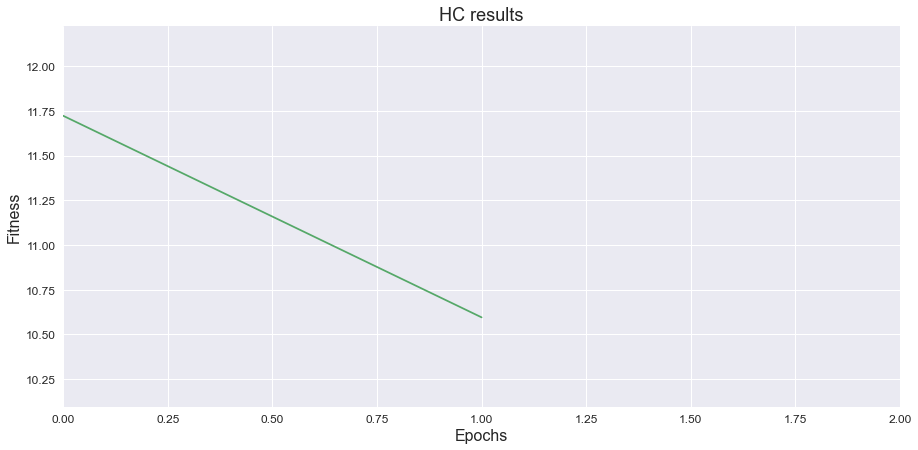

In [48]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn')

#general figure options
fig = plt.figure(figsize=(15, 7))
ax = plt.axes(xlim=(0, len(hcst.fitnesses)), ylim=(np.min(hcst.fitnesses)-0.5,np.max(hcst.fitnesses)+0.5))
line, = ax.plot([], [], lw=2)
ax.set_title('HC results', fontsize=18)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Fitness', fontsize=16)
ax.tick_params(labelsize=12)

epochs = [i for i in range(len(hcst.fitnesses))]

plt.plot(epochs, hcst.fitnesses)


plt.show()

You can see we now have a heavy use of `break` commands in the code. This is because now we have two distinct cycles.  
We must first iterate over the neighbors, evaluating them and looking for one that matches the acceptance criteria. If we find one that does, then we must `break` to exit that loop and finish the `while` loop iteration.  
On the other hand, if none of the neighbors matche the acceptance criteria, then we must have a mechanism to exit the `while` loop. A simple way to do this is having a variable that tells us when to stop, and that is evaluated at the end of the `while` loop.


### Bonus exercise

We have now seen how both the Standard and Steepest-ascent versions of the Hill Climber work, so let us introduce a third version: Stochastic HillClimber.  
This version of Hill Climber follows the following rules:

1. Set a maximum number of evaluations per iteration of the outer loop of the HC algorithm, $n$.
2. Generate a random initial solution, calculate it's fitness value, and set it as the current solution $i$.
3. Using the neighborhood function, generate the set of neighbors $N(i)$ from $i$, and return one random neighbor $j$.
4. Check if $j$ follows the acceptance criteria $f(j) >= f(i)$.
5. If $f(j) >= f(i)$ than the solution is accepted, $j$ becomes the current solution, we end the current iteration and we repeat step 3.
6. If $f(j) < f(i)$, we increment a counter $c$ and check if $c < n$  
    6.1 If $c < n$, then we repeat step 3 without ending the current iteration.  
    6.2 If $c >= n$, that means we have exhausted  our limit of evaluations and we should end the algorithm.  
    

In order to do this you will need to change the neighborhood function, so that it only returns one random neighbor, and the `fit` function, to match the remaining specifications.  
To return a random neighbor, you can store all the generated neighbors in a list, $x$, and use the `random.choice(x)` to return a random element from that list.